# Lab 5 / Topic Modelling with LDA

<sup>This lab is based on https://towardsdatascience.com/the-complete-guide-for-topics-extraction-in-python-a6aaa6cedbbc</sup>

Before we get started, we need to load the relevant Python modules that us used in the code later by running the next code cell.

In [1]:
import somialabs.lab5
%matplotlib inline

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/davidjohnson/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/davidjohnson/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Social Media and Digital Methods Lab 5 initialized... OK!


/Users/davidjohnson/Development/UppsalaIM/2IS060/.venv/lib/python3.6/site-packages/scipy/sparse/sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


To complete this lab:
1. Follow the instructions running the code when asked.
2. Discuss each question in your group.
3. Keep notes for your answers to the questions in a separate MS Word document (you can use [this template](Lab4_answers_template.docx)).
4. When completed, briefly discuss your answers with the Lecturer/Teaching Assistant attending your lab. You **do not** need to submit your answers to Studentportalen.

In this lab session, we will try out some *topic modelling*. 

A recurring subject in natural language processing and text analytics is to understand large corpus of texts through topics extraction. Whether you analyze users' online reviews, products' descriptions, or text entered in search bars, understanding key topics will always come in handy. This also applies to social media data, such as user posts on social networks, emails, and blogs.

In the last lab, we looked at *sentiment analysis*, which aims to determine the emotional tone behind words. By doing this we can classify documents as being positive or negative in tone. In topic modelling, we try and extract what documents are talking about by using statistics and computation.

In this lab, you will see how we can extract possible topics from articles posted on the BBC News website.

<img src="images/lda.png">

Before going into the LDA method, let me remind you that not reinventing the wheel and going for the quick solution is usually the best start. Several providers have great API for topic extraction (and it is free up to a certain number of calls): [Google](https://cloud.google.com/natural-language/), [Microsoft](https://docs.microsoft.com/en-us/azure/cognitive-services/text-analytics/how-tos/text-analytics-how-to-entity-linking), [MeaningCloud](https://www.meaningcloud.com/developer/topics-extraction)... and all of the three and all work very well.

However, if your data is highly specific, and no generic topic can represent it, then you will have to go for a more personalized approach. This lab focuses on one of these approaches: LDA.

## Understanding LDA

### Intuition
LDA (Latent Dirichlet Allocation) is an unsupervised machine-learning technique that takes documents as input and finds topics as output. The model also says in what percentage each document talks about each topic.

A topic is represented as a weighted list of words. An example of a topic is shown below:

    flower * 0,2 | rose * 0,15 | plant * 0,09 | ...
    
<img src="images/lda_workflow.png">

There are 3 main parameters of the model:

- the number of topics
- the number of words per topic
- the number of topics per document.

In reality, the last two parameters are not exactly designed like this in the algorithm, but I prefer to stick to these simplified versions which are easier to understand.

Run the code in the following cell to take a look at the BBC news document corpus that we will work with in this lab:

In [2]:
somialabs.lab5.view_bbc_corpus_head()

Image copyright PA/EPA Image caption Oligarch Roman Abramovich (l) and PM Dmitry Medvedev are on the list

Russian President Vladimir Putin says a list of officials and businessmen close to the Kremlin published by the US has in effect targeted all Russian people.

The list names 210 top Russians as part of a sanctions law aimed at punishing Moscow for meddling in the US election.

However, the US stressed those named were not subject to new sanctions.

Mr Putin said the list was an unfriendly act that complicated US-Russia ties but he said he did not want to escalate the situation.

Mr Putin said Russia should instead be thinking about "ourselves and the economy".

The list was also derided by a number of senior Russian officials who said it bore a strong resemblance to the Forbes magazine ranking of Russian billionaires. A US Treasury Department later told Buzzfeed that an unclassified annex of the report had been derived from the magazine.

Why did the US publish the list?

The gove

**Question 1.** Inspect a few of the documents listed from the BBC news corpus. Discuss in your group what words are important in determining topics by looking at the text of a document. How would you distinguish the important words from the non-important words that define a topic?

Run the following code cell to interact with the document corpus by filtering by language:

In [3]:
somialabs.lab5.interact_bbc_corpus_by_lang()

/Users/davidjohnson/Development/UppsalaIM/2IS060/.venv/lib/python3.6/site-packages/traitlets/traitlets.py:567: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  silent = bool(old_value == new_value)


interactive(children=(Dropdown(description='Language:', options=('en', 'fr', 'uk', 'hi', 'de', 'ru', 'pt', 'id…

**Question 2.** The corpus contains documents taken from more than one language. Using the drop-down box above, explore which languages of documents are contained in the corpus. Which languages are present? What challenges might this create when doing topic modelling?

Let's now try generating topic models on the corpus of only English language documents. The underlying code uses a package called *gensim* that implements LDA for you already.

Run the following code cell to do some preprocessing for topic modelling on articles from the BBC documents corpus:

In [4]:
somialabs.lab5.preprocess_to_pos_tagging()

Tokenizing sentences...



Tokenizing words...



Tokenizing POS tagging...


,articles,lang,sentences,tokens_sentences,POS_tokens
0,Image copyright PA/EPA Image caption Oligarch ...,en,[Image copyright PA/EPA Image caption Oligarch...,"[[Image, copyright, PA/EPA, Image, caption, Ol...","[[(Image, NN), (copyright, NN), (PA/EPA, NNP),..."
1,Husband admits killing French jogger\r\n\r\nTh...,en,[Husband admits killing French jogger\r\n\r\nT...,"[[Husband, admits, killing, French, jogger, Th...","[[(Husband, NNP), (admits, VBZ), (killing, VBG..."
2,Media playback is unsupported on your device M...,en,[Media playback is unsupported on your device ...,"[[Media, playback, is, unsupported, on, your, ...","[[(Media, NNP), (playback, NN), (is, VBZ), (un..."
3,Manchester City's Leroy Sane is ruled out for ...,en,[Manchester City's Leroy Sane is ruled out for...,"[[Manchester, City, 's, Leroy, Sane, is, ruled...","[[(Manchester, NNP), (City, NNP), ('s, POS), (..."
4,Image copyright AFP Image caption Sebastien Br...,en,[Image copyright AFP Image caption Sebastien B...,"[[Image, copyright, AFP, Image, caption, Sebas...","[[(Image, NN), (copyright, NN), (AFP, NNP), (I..."
5,The middle of nowhere\r\n\r\nFive miles from t...,en,[The middle of nowhere\r\n\r\nFive miles from ...,"[[The, middle, of, nowhere, Five, miles, from,...","[[(The, DT), (middle, NN), (of, IN), (nowhere,..."
6,Image copyright Reuters Image caption Mr Trump...,en,[Image copyright Reuters Image caption Mr Trum...,"[[Image, copyright, Reuters, Image, caption, M...","[[(Image, NN), (copyright, NN), (Reuters, NNP)..."
7,Putin says US list targets all Russians\r\n\r\...,en,[Putin says US list targets all Russians\r\n\r...,"[[Putin, says, US, list, targets, all, Russian...","[[(Putin, NNP), (says, VBZ), (US, NNP), (list,..."
8,Image copyright Getty Images\r\n\r\nIt is the ...,en,[Image copyright Getty Images\r\n\r\nIt is the...,"[[Image, copyright, Getty, Images, It, is, the...","[[(Image, NN), (copyright, VBD), (Getty, NNP),..."
9,Image copyright Reuters Image caption The high...,en,[Image copyright Reuters Image caption The hig...,"[[Image, copyright, Reuters, Image, caption, T...","[[(Image, NN), (copyright, NN), (Reuters, NNP)..."


What this has done is taken the original article text, split it into a list of sentences, then taken each sentence and split it into a list of words (at which point we have a list of lists of words), then it applies part-of-speech tagging (POS) to classify each word according some kind of word-type.

Let's look closer at the POS tags allocated to each token in the first article. Run the following code cell to generate a table summarising the words and tags:

In [5]:
somialabs.lab5.preprocess_to_pos_tagging_and_get_first()

Tokenizing sentences...



Tokenizing words...



Tokenizing POS tagging...



Selecting first article and POS tags...


,Word,Tag
0,Mr,NNP
1,Putin,NNP
2,said,VBD
3,the,DT
4,list,NN
5,was,VBD
6,an,DT
7,unfriendly,JJ
8,act,NN
9,that,WDT


Here is the POS tag list for what each tag means (and some examples in English):
```
CC   coordinating conjunction
CD   cardinal digit
DT   determiner
EX   existential there (like: "there is" ... think of it like "there exists")
FW   foreign word
IN   preposition/subordinating conjunction
JJ   adjective	'big'
JJR  adjective, comparative	'bigger'
JJS  adjective, superlative	'biggest'
LS   list marker	1)
MD   modal	could, will
NN   noun, singular 'desk'
NNS  noun plural	'desks'
NNP  proper noun, singular	'Harrison'
NNPS proper noun, plural	'Americans'
PDT  predeterminer	'all the kids'
POS  possessive ending	parent's
PRP  personal pronoun	I, he, she
PRP$ possessive pronoun	my, his, hers
RB   adverb	very, silently,
RBR  adverb, comparative	better
RBS  adverb, superlative	best
RP   particle	give up
TO   to	go 'to' the store.
UH   interjection	errrrrrrrm
VB   verb, base form	take
VBD  verb, past tense	took
VBG  verb, gerund/present participle	taking
VBN  verb, past participle	taken
VBP  verb, sing. present, non-3d	take
VBZ  verb, 3rd person sing. present	takes
WDT  wh-determiner	which
WP   wh-pronoun	who, what
WP$  possessive wh-pronoun	whose
WRB  wh-abverb	where, when
```

**Question 3.** Do POS tags help identify different words' definition and context? Why might POS tagging be helpful for topic modelling? 

In [6]:
somialabs.lab5.preprocess_to_lemmatization_and_get_first()

Tokenizing sentences...



Tokenizing words...



Tokenizing POS tagging...



Lemmatizing words...



Selecting first article and lemmatized list...


,Word
0,Mr
1,Putin
2,say
3,the
4,list
5,be
6,an
7,unfriendly
8,act
9,that


**Question 4.** Compare the output above after lemmatization to the output after only POS tagging. How has lemmatization changed the text? How might this effect generated topics from topic modelling?

Run the following code cell to interact with the lemmatization function. Try typing your own text to test the lemmatization behaviour. For example, try something like `jump jumping jumped`.

In [7]:
somialabs.lab5.interact_lemmatization()

interactive(children=(Text(value='type something here', description='text'), Output()), _dom_classes=('widget-…

Run the following code cell to generate topic models from the BBC articles corpus:

In [8]:
somialabs.lab5.gensim_on_bbc_docs()

Tokenizing sentences...



Tokenizing words...



Tokenizing POS tagging...



Lemmatizing words...



0: 0.010*"animal" + 0.009*"specie" + 0.009*"help" + 0.007*"night" + 0.007*"find" + 0.006*"day" + 0.006*"light" + 0.006*"part" + 0.006*"predator" + 0.006*"act" + 0.006*"transparent" + 0.005*"however" + 0.005*"us" + 0.005*"area" + 0.005*"drug" + 0.005*"team" + 0.005*"water" + 0.005*"release" + 0.005*"local" + 0.005*"fish"

1: 0.016*"images" + 0.011*"customer" + 0.009*"star" + 0.008*"moment" + 0.007*"night" + 0.007*"time" + 0.007*"add" + 0.007*"give" + 0.007*"show" + 0.006*"woman" + 0.006*"year" + 0.006*"reuters" + 0.006*"call" + 0.006*"event" + 0.005*"performance" + 0.005*"prize" + 0.005*"home" + 0.005*"supermarket" + 0.004*"another" + 0.004*"could"

2: 0.006*"us" + 0.006*"work" + 0.005*"people" + 0.005*"first" + 0.005*"time" + 0.005*"year" + 0.004*"city" + 0.004*"show" + 0.004*"back" + 0.004*"become" + 0.004*"home" + 0.004*"restaurant" + 0.004*"part" + 0.004*"run" + 0.004*"tunnel" + 0.004*"old" + 0.004*"could" + 0.004*"dish" + 0.004*"find" + 0.004*"bring"

3: 0.014*"separatist" + 0.011

**Question 5.** Topics generated consist of a list of words and a corresponding weight (value) to indicate how important a word is in the topic model given. Take a look at the topics generated from the code above. Are they easy to interpret? In your group try and determine what each of the 20 topics listed might be about.

Run the following code cell to generate topic models from the BBC articles corpus, and then use the interactive slider to explore some of the articles and the matched topics from the topic modelling:

In [ ]:
somialabs.lab5.interact_gensim_on_bbc_docs()

Tokenizing sentences...



Tokenizing words...



Tokenizing POS tagging...



Lemmatizing words...



0: 0.010*"animal" + 0.009*"specie" + 0.009*"help" + 0.007*"night" + 0.007*"find" + 0.006*"day" + 0.006*"light" + 0.006*"part" + 0.006*"predator" + 0.006*"act" + 0.006*"transparent" + 0.005*"however" + 0.005*"us" + 0.005*"area" + 0.005*"drug" + 0.005*"team" + 0.005*"water" + 0.005*"release" + 0.005*"local" + 0.005*"fish"

1: 0.016*"images" + 0.011*"customer" + 0.009*"star" + 0.008*"moment" + 0.007*"night" + 0.007*"time" + 0.007*"add" + 0.007*"give" + 0.007*"show" + 0.006*"woman" + 0.006*"year" + 0.006*"reuters" + 0.006*"call" + 0.006*"event" + 0.005*"performance" + 0.005*"prize" + 0.005*"home" + 0.005*"supermarket" + 0.004*"another" + 0.004*"could"

2: 0.006*"us" + 0.006*"work" + 0.005*"people" + 0.005*"first" + 0.005*"time" + 0.005*"year" + 0.004*"city" + 0.004*"show" + 0.004*"back" + 0.004*"become" + 0.004*"home" + 0.004*"restaurant" + 0.004*"part" + 0.004*"run" + 0.004*"tunnel" + 0.004*"old" + 0.004*"could" + 0.004*"dish" + 0.004*"find" + 0.004*"bring"

3: 0.014*"separatist" + 0.011

interactive(children=(IntSlider(value=0, description='article_num'), Output()), _dom_classes=('widget-interact…

**Question 6.** Explore several articles and inspect the corresponding topics that the articles are matched to. How well do these article-topic matches correspond to your own group's interpretation of the topic models that were generated? What makes using computer-genreated topics difficult to use?

Run the following code cell to view a heatmap visualization of the proportion of topics in the documents (Documents are rows, topic are columns):

Tokenizing sentences...



Tokenizing words...



Tokenizing POS tagging...



Lemmatizing words...


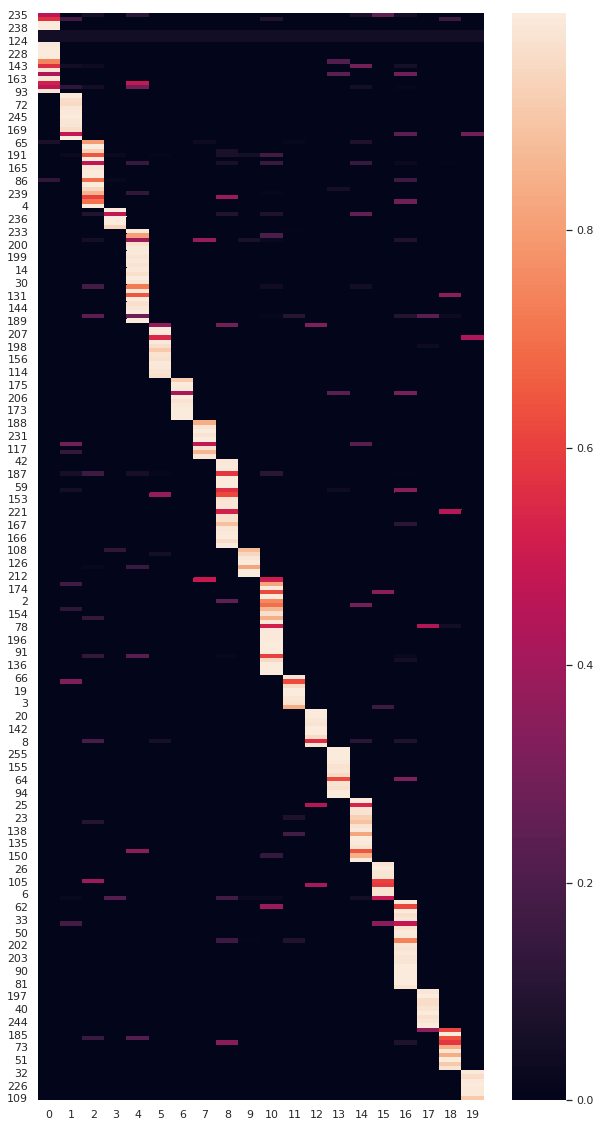

In [ ]:
somialabs.lab5.visualize_topic_distribution()

**Question 7**. What do you observe about the distribution of the number of documents that have been allocated to each topic?

Run the following code cell to interact with a visualization of the the LDA topic model. This visualization allows you to compare topics on two reduced dimensions and observe the distribution of words in topics. Take a look at the most relevant terms for various topics:

In [ ]:
somialabs.lab5.visualize_lda_model()  # be patient, this one takes a little longer to load

Tokenizing sentences...



Tokenizing words...



Tokenizing POS tagging...



Lemmatizing words...


**Question 8.** What do you observe about the top relevant terms for different topics? How might the topic model be improved using data preprocessing? 

**Question 9.** The inter-topic visualization tries to show how similar some topics are. Do the topics overlap a lot? If so, why might this be problematic in determining topics for different articles?

**Question 10.** Do all of the topics generated cover all possible topics about the documents?

## How to successfully implement LDA
LDA is a complex algorithm which is generally perceived as hard to fine-tune and interpret. Indeed, getting relevant results with LDA requires a strong knowledge of how it works. In this lab we did not go into the technical details of how it works, but only explored on a high level how to use something like LDA for topic modelling.

### Data cleaning
A common thing you will encounter with LDA is that words appear in multiple topics. One way to cope with this is to add these words to your stopwords list.

Another thing is plural and singular forms. I would recommend lemmatizing — or stemming if you cannot lemmatize but having stems in your topics is not easily understandable.

Removing words with digits in them will also clean the words in your topics. Keeping years (2006, 1981) can be relevant if you believe they are meaningful in your topics.

Filtering words that appear in at least 3 (or more) documents is a good way to remove rare words that will not be relevant in topics.

### Data preparation
Include bi- and tri-grams to grasp more relevant information.

Another classic preparation step is to use only nouns and verbs using POS tagging (POS: Part-Of-Speech).

### Fine-tuning
- Number of topics: try out several numbers of topics to understand which amount makes sense. You actually need to see the topics to know if your model makes sense or not. As for K-Means, LDA converges and the model makes sense at a mathematical level, but it does not mean it makes sense at a human level.
- Cleaning your data: adding stop words that are too frequent in your topics and re-running your model is a common step. Keeping only nouns and verbs, removing templates from texts, testing different cleaning methods iteratively will improve your topics. Be prepared to spend some time here.
- Alpha, Eta. We did not touch on the technical stuff in this lab. If implementing LDA using code, you can tweak alpha and eta to adjust your topics. Start with 'auto', and if the topics are not relevant, try other values. I recommend using low values of Alpha and Eta to have a small number of topics in each document and a small number of relevant words in each topic.
- Increase the number of passes to have a better model. 3 or 4 is a good number, but you can go higher.

### Assessing results
- Are your topics interpretable?
- Are your topics unique? (two different topics have different words)
- Are your topics exhaustive? (are all your documents well represented by these topics?)

If your model follows these 3 criteria, it looks like a good model :)

## Main advantages of LDA
### It’s fast

Use the %time command in Jupyter to verify it. The model is usually fast to run. Of course, it depends on your data. Several factors can slow down the model:

- Long documents
- Large number of documents
- Large vocabulary size (especially if you use n-grams with a large n)

### It’s intuitive
Modelling topics as weighted lists of words is a simple approximation yet a very intuitive approach if you need to interpret it. No embedding nor hidden dimensions, just bags of words with weights.

### It can predict topics for new unseen documents

Once the model has run, it is ready to allocate topics to any document. Of course, if your training dataset is in English and you want to predict the topics of a Chinese document it won’t work. But if the new documents have the same structure and should have more or less the same topics, it will work.

## Main disadvantages of LDA
### Lots of fine-tuning

If LDA is fast to run, it will give you some trouble to get good results with it. That’s why knowing in advance how to fine-tune it will really help you.

### It needs human interpretation

Topics are found by a machine. A human needs to label them in order to present the results to non-experts people.

### You cannot influence topics

Knowing that some of your documents talk about a topic you know, and not finding it in the topics found by LDA will definitely be frustrating. And there’s no way to say to the model that some words should belong together. You have to sit and wait for the LDA to give you what you want.